# CNN Project: Dog Breed Classifier
## Machine Learning Engineer Nanodegree
## Capstone Project
Kenneth Preston
January 4th, 2020

## I. Definition

### Project Overview


This project is udacity suggested. It involves training a custom deep learning model to identify dog breeds. It is an opportunity to explore the pytorch package and practice image classification.

#### Problem Domain
The problem domain is image classification. So it is a classification problem, but also requires an approproach appropriate for working with images (convolutional layers). This is simply a computer vision problem. The problem is simply to classify an image of one subject (one dog, or one human) as a dog of a specific breed. The algorithm will view an image of a dog or a person and return a prediction of the type of dog it is (or what dog a human looks like).

Achieving accuracy in this classification task seemed to be a challenge because there would likely be a lot of similarities between the breeds. I assumed that the task would be more difficult than differientiating between a Cat and a Dog. I was interested in this problem mainly because I find computer vision the most facinating topic in artificial intelligence.

#### Project Origin
This project comes from a udacity suggested problem. This specific project is a popular one and is used in other udacity nanodegree programs as well as by the AI community in general. I believe the origin is simply a multiclass classification problem for image classification.
#### Datasets
This project uses two datasets, but mainly relies on the dog dataset for training purposes.
- Dog images: https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
- Human images: https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip
The inputs are images of a single entity, either a dog (in the dog dataset) or a human (in the human dataset). They are not complicated by multiple entities in one image (such as a mix of dogs and humans). The files provided are in the jpg format and easily machine readable at sensible image sizes (will outline this further below). The image sizes do vary so preprocessing is necessary to train or evaluate the model (i.e. produce predictions)

### Problem Statement

#### The Problem
The problem I am trying to solve is to predict accurately the breed of a dog from a image. The range of dog breeds as defined by this project is 133 breeds. I would like to predict the one breed the image is most likely to be. A fun application of this derived model is to be able to predict which dog breed a human looks like when providing the model with human faces instead of dogs.

#### The Strategy
The strategy I will employ to tackle this problem is as follows:
- In practice I will follow the dog_app.ipynb notebook provided at the github address: https://github.com/udacity/deep-learning-v2-pytorch.git under the project-dog-classification folder.
- I will use a training and validation set of images to train a multiclass image classification algorithm and then build a function that ingests an image and provides a dog breed prediction from that image. I will also use a dog and human face detector to determine whether the image is of a human or a dog and change the message shown to the user based on this information.
- Although part of the notebook will have me attempting to build a classification model from scratch, the model I will put into the application will be one based on transfer learning using a pretrained model that will have all its layers frozen accept for the final layer used for classification. This way I can use the benefits of using a model trained on many more images than I can afford to do by myself. 
- In order to augment my understanding of this subject I will use the pytorch documentation heavily and also rely alot on google searches to trouble shoot the issues I come up to when developing my model from scratch and my transfer learning model. Although I have taken courses on this subject I will use online tutorials as inspiration when trying out different model architectures, preprocessing techniques, and finding solutions to issues such as when my model overfits or my accuracy level does not improve.

#### The Solution
To solve this issues I will be standing on the shoulders of giants in computer vision. I will be using the hard work of others that have built accurate image classifiers and apply their solution to my problem through transfer learning. This will provide me with an accurate dog breed classifier that I can use in conjunction with a human face detector and a dog face detector. For the face detectors I can also rely on accurate models that are publicly available. For face detection I can simply used pretrained models already capable at performing this task. The resulting application will accomplish the following tasks:
- Ingest an image file of jpg format.
- Identify if a human or a dog is present.
- Identify which breed of dog it thinks is present.
- Return the image with a text message letting the user know whether it is a dog or human in the image and then which breed it thinks the dog or human looks the most like.

### Metrics

The metrics I will be using to measure the performance of the model  I will be building to identify dog breeds will include:
- During training I will be using a loss function called multi-class cross-entropy loss as applied to the validation set. This will help me understand how well my model is improving as the training is proceeding. This is used as an appropriate loss function for multi-class classification as it is often the default loss function for this type of problem (https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/). A full explaination of this loss function can be found here: https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html#cross-entropy. In laymen terms this loss function produces a lower loss when the correct answer is more confidently predicted (i.e. probability approaches 1) while also increasing the loss when confidently predicting (i.e. closer to 1) an incorrect classification. I believe this is an obvious choice of loss function for the task of multi-class classification.
- When evaluating the model's performance after training I will be relying on a simple test accuracy score as defined in the provided notebook. The math is simple: <b> Total # of Correct Predictions / Total Number of Images Tested </b>. I believe this is an appropriate measure of performance as it clearly reveals how often the model is correct in its prediction. Analyses of false negatives or positives is not necessary because this classification task if trivial. If we were conducting multi-class classification in something like cancer screening we would want to ensure we focus more on metrics that look at false positives and false negatives as these mistakes would cost lives or create worry for users. Incorrectly predicting a dog breed of a dog or human is a trivial task and I believe we can focus solely on just improving accuracy and not weigh or evaluate false negatives or false positives.

## II. Analysis

### Data Exploration

The main dataset used for this problem is a dog image dataset that was provided for this project. This project is available here for interested readers: https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip. The dataset includes 8351 jpg format dog images organized by dog breed folders for a total of 133 folders. Each folder has between 26 and 77 images of a specific breed of dog. From a limited look through the images we can see that the images range in size on both height and width. This suggests that we will need to transform these images to a standard size to use for training, validation, and testing data. Otherwise the data looks very clean and currated for this project.

In [4]:
import numpy as np
from glob import glob

dog_files = np.array(glob("/data/dog_images/*/*/*"))
print('There are %d total dog images.' % len(dog_files))

There are 8351 total dog images.


Below are the folders included in the training data. The same folders are found in the validation and test folders as well.

In [56]:
ls /data/dog_images/train/

001.Affenpinscher/                   068.Flat-coated_retriever/
002.Afghan_hound/                    069.French_bulldog/
003.Airedale_terrier/                070.German_pinscher/
004.Akita/                           071.German_shepherd_dog/
005.Alaskan_malamute/                072.German_shorthaired_pointer/
006.American_eskimo_dog/             073.German_wirehaired_pointer/
007.American_foxhound/               074.Giant_schnauzer/
008.American_staffordshire_terrier/  075.Glen_of_imaal_terrier/
009.American_water_spaniel/          076.Golden_retriever/
010.Anatolian_shepherd_dog/          077.Gordon_setter/
011.Australian_cattle_dog/           078.Great_dane/
012.Australian_shepherd/             079.Great_pyrenees/
013.Australian_terrier/              080.Greater_swiss_mountain_dog/
014.Basenji/                         081.Greyhound/
015.Basset_hound/                    082.Havanese/
016.Beagle/                          083.Ibizan_hound/
017.Bearded_collie/                  084.Iceland

In this code chunk below I am showing the number of files in each folder range between 26 to 77 images in the training set. There are between 4 and 9 in the validation set. The test set has between 4 and 10.

In [54]:
folderimnum = []
folderval = []
foldertest=[]
dogtrain = glob("/data/dog_images/train/*")
dogval = glob("/data/dog_images/valid/*")
dogtest = glob("/data/dog_images/test/*")
for i in dogtrain:
    folderimnum.append(len(glob(i+"/*")))
for i in dogval:
    folderval.append(len(glob(i+"/*")))
for i in dogtest:
    foldertest.append(len(glob(i+"/*")))
print("Training: There are between {} and {} images in each folder of a breed of dog".format(min(folderimnum), max(folderimnum)))
print("Validation: There are between {} and {} images in each folder of a breed of dog".format(min(folderval), max(folderval)))
print("Test: There are between {} and {} images in each folder of a breed of dog".format(min(foldertest), max(foldertest)))

Training: There are between 26 and 77 images in each folder of a breed of dog
Validation: There are between 4 and 9 images in each folder of a breed of dog
Test: There are between 3 and 10 images in each folder of a breed of dog


### Exploratory Visualization

Below are some example images. You will notice that the images range in exact size. This suggests the images need to be transformed in order to be used for model building.

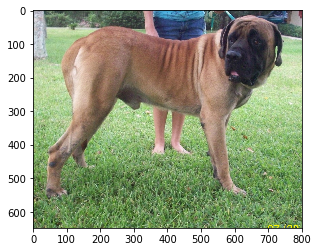

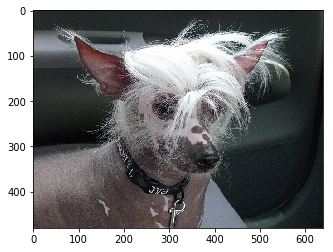

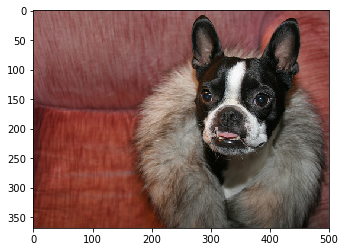

In [59]:
import cv2
import matplotlib.pyplot as plt                        
%matplotlib inline         
for i in [glob("/data/dog_images/train/*/*")[0], glob("/data/dog_images/train/*/*")[300], glob("/data/dog_images/train/*/*")[700]]:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()


Below is a visualization of the shapes of the images that are included in the training set. We can see that the majority of them are relatively small, while some images are very large. This gives a clear indication that the images need to be resized when preprocessing the data. You can see that all images have 3 color channels, but vary widely on the other dimensions (height and width)

In [104]:
height =[]
width =[]
channel =[]
for i in glob("/data/dog_images/train/*/*"):
    img = cv2.imread(i)
    height.append(img.imag.shape[0])
    width.append(img.imag.shape[1])
    channel.append(img.imag.shape[2])

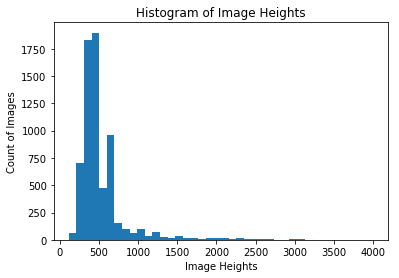

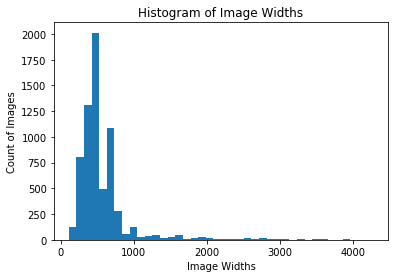

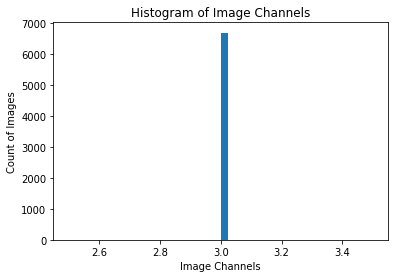

In [109]:
import numpy as np
plt.hist(height, bins=40)
plt.title("Histogram of Image Heights")
plt.xlabel("Image Heights")
plt.ylabel("Count of Images")
plt.show()

plt.hist(width, bins=40)
plt.title("Histogram of Image Widths")
plt.xlabel("Image Widths")
plt.ylabel("Count of Images")
plt.show()

plt.hist(channel, bins=40)
plt.title("Histogram of Image Channels")
plt.xlabel("Image Channels")
plt.ylabel("Count of Images")
plt.show()

### Algorithms and Techniques

For this project I will be using convolutional neuro networks to solve this problem. This problem of multiclass image categorization is commonly addressed with deep convolutional nets. I used these techniques in two major ways: for a model from scratch and finally through transfer learning. The deep learning framework used for this project is entirely pytorch.

#### Model from Scratch

A convolutional net gets its name because it includes stacks of convolutional layers. These layers essentially uses a kernal or filter of certain size to scan an input matrix representing an image and creates a convolutional layer. These layers are stacked on top of one another to help discover more complicated features.
(https://michhar.github.io/convolutional-in-layers-and-sequences/)
A convolutional net typically includes a few other layers including: A pooling layer is used reduce the number of parameters in a model. An activation layer is used to identify whether a neuron is activated and is essential for introducing non-linearity in the model, which is essential for identifying unique features. ReLU (rectified linear unit) is the standard activation function used. This function looks like this: 

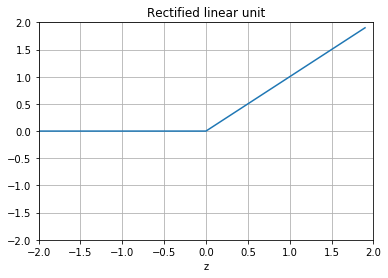

In [112]:
# from: https://github.com/colah/nnftd/blob/master/fig/chap3/relu.py
z = np.arange(-2, 2, .1)
zero = np.zeros(len(z))
y = np.max([zero, z], axis=0)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(z, y)
ax.set_ylim([-2.0, 2.0])
ax.set_xlim([-2.0, 2.0])
ax.grid(True)
ax.set_xlabel('z')
ax.set_title('Rectified linear unit')

plt.show()

Another layer I used heavily is the batch normalization layer. This is used to normalize the input layer and is generally applied to improve speed, performance and make models more stable (https://en.wikipedia.org/wiki/Batch_normalization). To help prevent overfitting I also employed dropout, which essentially drops out parts of a channel when training a model. This helps the model generalize better by artificially adding noise to the training data.

When building my model from scratch I chunked together the following configuration of these layers:

convolutional > relu > batch normalization > pooling

I stacked 5 of these chunks together and then put the dropout layer at the end and connected that to a linear layer that produces the classification results by ending in 133 features, one for each dog breed.

#### Transfer Learning Model
The transfer learning model was constructed differently. Transfer learning uses an existing model that has been pre-trained by others. The main benefit of using transfer learning is to save yourself the costs (in time, data, and money) of building a robust model from scratch. 

The basic method uses is to:
1. Import a pretrained model
2. Freeze all the layers (layers weights will not be updated)
3. Unfreeze some final layer(s) to have its weights updated when training. In my case I just replaced the final layer with new linear unit with 133 output features to match the number of dog breeds.

#### Model optimization technique
In order to train the models (from scratch and transfer) I used stochastic gradient descent to minimize the cost functions and in the model. A more detailed explaination of stochastic gradient descent can be found here: https://en.wikipedia.org/wiki/Stochastic_gradient_descent 

I also used a learning rate scheduler to help adjust the learning rate of the stochastic gradient descent optimization whenever needed. I used a technique that reduces the learning rate whenever loss on the validation data set was not improving.

### Benchmark

The benchmark is simply to beat the predefined cut off values to pass this project. These values were explicity given in the dog_app notebook.

For the model from scratch the test accuracy to beat is 10%, 
while the test accuarcy to beat for the transfer learning model is 60%.

## III. Methodology

### Data Preprocessing

#### Data Augmentation
As mentioned earlier, one of the major data issues I noticed was the sizes of the images being inconsistent. I wanted to start the preprocessing by taking a random crop of the image from 0.08 to 1.0 of the entire image and then resizing the image to a standard 224. I was warry of this technique, but it was used in the inception net training so I assumed it would be helpful when training. I used this technique also on the validation and test data transformations.

I applied a horizontal flip on the training image as I assumed the image would be valid even flipped horizontally. I applied a random rotation of a small amount (10 degrees). I then converted the image to a tensor and applied a normalization technique from imagenet that was given as an example in the pytorch documentation (rom https://github.com/pytorch/examples/blob/42e5b996718797e45c46a25c55b031e6768f8440/imagenet/main.py#L89-L101)

For the test and validation datasets I still applied the random resized crop and resize to 224, converted to tensorflow and applied the same normalization technique. 

In [ ]:
transform_pipeline_train = transforms.Compose([
                                         transforms.RandomResizedCrop(224),
                                         transforms.RandomHorizontalFlip(),
                                         transforms.RandomRotation(10),
                                         transforms.ToTensor(),
                                         transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
                                        ])

transform_pipeline_test = transforms.Compose([transforms.RandomResizedCrop(224),
                                         transforms.ToTensor(),
                                         transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
                                        ])

### Implementation

In this section I included code snippets from my implemented models along with a diagram of the vgg16 model I used in transfer learning. I will also outline how the final app was created by combining 3 models: one for human face detection, one for dogs, and lastly the transfer learning model. Earlier sections clearly documented the metrics and algorithms and discussed the preprocessing steps taken. 

I ran into a number of complications when training the model from scratch. Mainly I toyed with many model designs of differing number of layers and various output layer sizes. I constantly ran into the issue of balancing batch size with image size and available resources on cuda memory on the dog project workspace provided by udacity for this project. My original metrics I used changed slightly. I tried a few different optimization algorthims, including ADAM, and I only added the learning rate scheduler later on in the iterative modeling process. Data augmentation techniques (i.e. preprocessing) were tweaked constantly. My evaluation metrics remained the same.

#### Custom Model from Scratch

In [ ]:
### TODO: select loss function
criterion_scratch = torch.nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = torch.optim.SGD(model_scratch.parameters(), lr=0.1, momentum=0.9)
scheduler_scratch = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_scratch, 'min')

In [ ]:
def __init__(self):
        super(Net, self).__init__()
        dep1 = 16
        dep2 = dep1 * 2
        dep3 = dep2 * 2 
        dep4 = dep3 * 2 
        dep5 = dep4 * 2 
        
        # Dropout Layer
        self.drop = nn.Dropout(0.25)
        
        # Batch normalization to help each layer to learn on a more stable distribution of inputs,
        # and would accelerate the training of the network - 
        # https://mlexplained.com/2018/01/10/an-intuitive-explanation-of-why-batch-normalization-really-works-normalization-in-deep-learning-part-1/
        self.norm1 = nn.BatchNorm2d(dep1)
        self.norm2 = nn.BatchNorm2d(dep2)
        self.norm3 = nn.BatchNorm2d(dep3)
        self.norm4 = nn.BatchNorm2d(dep4)
        self.norm5 = nn.BatchNorm2d(dep5)
        
        # pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2)
        
        # convolutional layers. Tried 3-7 covnets, but landed on 5 after trial and error.
        
        self.con1 = nn.Conv2d(in_channels=3, out_channels=dep1, kernel_size=3,stride = 1,padding = 0)
        self.con2 = nn.Conv2d(in_channels=dep1, out_channels=dep2, kernel_size=3,stride = 1, padding = 0)
        self.con3 = nn.Conv2d(in_channels=dep2, out_channels=dep3, kernel_size=3, stride = 1, padding = 0)
        self.con4 = nn.Conv2d(in_channels=dep3, out_channels=dep4, kernel_size=3,stride = 1, padding = 0)
        self.con5 = nn.Conv2d(in_channels=dep4, out_channels=dep5, kernel_size=3, stride = 1, padding = 0)
        
        # activation function: Relu - choosen as default because it is the best known activation function between layers
        self.relu = nn.ReLU()
        
        # fully connected layer to give dog breed prediction
        self.fullconn = nn.Linear(in_features=dep5 * 5 * 5, out_features=133)
    
    def forward(self, x):
    ## Define forward behavior
        dep1 = 16
        dep2 = dep1 * 2
        dep3 = dep2 * 2 
        dep4 = dep3 * 2 
        dep5 = dep4 * 2 

        x = self.con1(x)
        x = self.relu(x)
        x = self.norm1(x)                
        x = self.pool(x)

        x = self.con2(x)
        x = self.relu(x)
        x = self.norm2(x)       
        x = self.pool(x)
        
        x = self.con3(x)
        x = self.relu(x)
        x = self.norm3(x)       
        x = self.pool(x)
        
        x = self.con4(x)
        x = self.relu(x)
        x = self.norm4(x)       
        x = self.pool(x)
        
        x = self.con5(x)
        x = self.relu(x)
        x = self.norm5(x)       
        x = self.pool(x)
        
        #print(x.shape)
        x = x.view(-1, dep5 * 5 * 5)
        
        x = self.drop(x)
        x = self.fullconn(x)
    
        return x

#### Transfer Learning Model Defined

In [ ]:
### TODO: select loss function
criterion_transfer = torch.nn.CrossEntropyLoss()

### TODO: select optimizer
# https://github.com/amdegroot/ssd.pytorch/issues/109
optimizer_transfer = torch.optim.SGD(filter(lambda p: p.requires_grad,model_transfer.classifier.parameters()), lr=0.1, momentum=0.9)
scheduler_transfer = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_transfer, 'min')

In [ ]:
## TODO: Specify model architecture 
model_transfer = models.vgg16(pretrained=True) # using the model with low error according to: 
# https://pytorch.org/docs/stable/torchvision/models.html
# reference: https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html
numofbreeds = 133
# Freeze All Layers
for parameters in model_transfer.parameters(): parameters.requires_grad = False
# Replace last layer of classifier to match number of breeds
# last layer is unfrozen by default
model_transfer.classifier[6] = nn.Linear(model_transfer.classifier[6].in_features, numofbreeds, bias=True)

if use_cuda: model_transfer = model_transfer.cuda()

Below is an image depicting the vgg16 architecture:

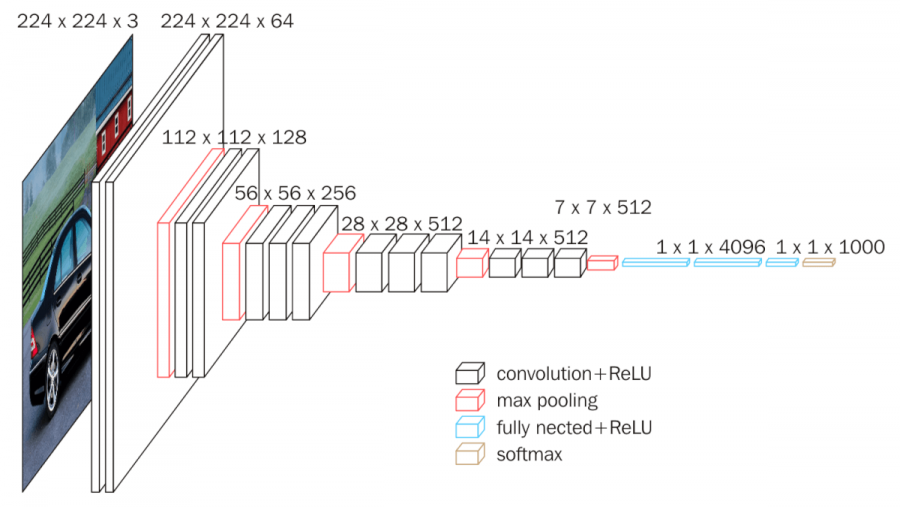

In [118]:
from IPython.display import Image                        
url='https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png'
Image(url)

#### The App Coded

I included below the code for the human face detector, dog detector, the app, and how to use it. This implementation used the 3 seperate models to run the app (face detector, pretrained vgg16, and transfer learned version of vgg16).

Human Face detector:

In [ ]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

Dog detector:

In [ ]:
def dog_detector(img_path):
    ## TODO: Complete the function.
    preds = VGG16_predict(img_path) # this function can be found here: https://github.com/Jaroken/Dog-Breed-Classifier/blob/master/dog_app.ipynb
    
    return (preds >= 151) & (preds <= 268) # true/false

The App:

In [ ]:
def run_app(img_path, model_transfer, class_names):
    ## handle cases for a human face, dog, and neither
    human_found = face_detector(img_path)
    dog_found = dog_detector(img_path)
    
    if human_found > 0:
        print('Hello Human! Your doggy-doppelganger is a: ' + predict_breed_transfer(img_path, model_transfer, class_names))
    if dog_found > 0:
        print('Good Doggy! You look like a: ' + predict_breed_transfer(img_path, model_transfer, class_names))       
    if (human_found == 0) & (dog_found == 0):
        print('Error: No Dog or Human found in picture. Is there either in picture?')

Using the App:

In [ ]:
for file in np.hstack((human_files[:3], dog_files[:3])):
    
    print('Running dog breed app for file: {}'.format(file))
    run_app(file, model_transfer, class_names)
    
    plt.imshow(Image.open(file))
    plt.show()

### Refinement

Initially my model accuracy was very poor. I found I refined a number of issues with my models.

I had initially created a large custom model and created an architecture with many layers that pooled to too small of sizes and simply would not train well. To help address this I started with implementing a simple three convolutional layer net and then increasing and training the model to test it out.

Initially I was training with very small training batch sizes. I then changed this approach to dial up the size of the training batch to 64 and reduced the validation and training batch size. This helped improve my models training.

I was using odd output sizes for my layers at first. Then I looked into suggestions for initial feature output sizes and then doubling this value at each level. It was recommend I try 32, 64, 128, and 256. I ended up scaling this down by halving 32 to 16. This appeared to work very well.(https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network_)

I was also initially using Adam for my optimizer. I looked into learning rate schedulers and then I added this with a SGD optimizer and this also seemed to help my model from getting stuck during training and not improving the model for many epochs.

Before making the above changes I was getting 3% test accuracy after training on 100 epochs. The final accuracy of the model was 25% after training for 100 epochs.

For the transfer learning model I initially incorrectly unfroze too many layers of the classification layer of the model. What ended up working very well was simply unfreezing the final layer and resizing the output to match the number of dog breeds. I also initially only trained on 20 epochs, and got 65% test accuracy. After training for 40 epochs I improved to 74% accuracy.

## IV. Results

### Model Evaluation and Validation

The final model chosen to be used in the app was the transfer learning model. This model was the suggested final model to use for the app, but it also had much better performance than the custom model from scratch. I believe the final model is reasonable given its performance in the app seemed to be accurate in many cases of the few I ran. 

Below I will include the final scores for the transfer learning model and the model from scratch for comparison. Also the benchmarks are used for comparison. These final scores are based on a test sample that was held seperate by design of the dataset provided and therfore a good sample of unseen data. You will see that the models beat the benchmarks provided and robust enough to the trivial problem of detecting dog breeds. I believe the results can be trusted to a certain degree of certainty.


### Justification

The final results are stronger than the benchmarked results reported earlier. I believe these results suggest the model can be used as it notably improved upon the benchmark enough to pass the assignment and work in the application.

##### Transfer learning model
- Test Accuracy: 74% (621/836)
- Benchmark: 60%
- Improvement: 23% improvement 74/60 - 1

##### Model from scratch
- Test Accuracy: 25% (621/836)
- Benchmark: 10%
- Improvement: 150% improvement 25/10 - 1

## V. Conclusion


### Free-Form Visualization

#### Actual App Output
You can see below that the prediction of the mastiff seems to be pretty accurate. To confirm the prediction I included the file path it was testing along with a google image of mastiff to validate with outside data.

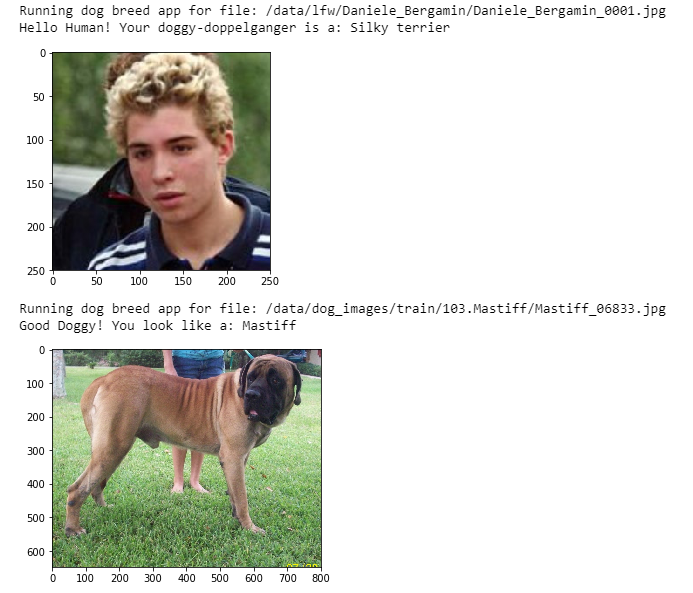

In [126]:
url='https://raw.githubusercontent.com/Jaroken/Dog-Breed-Classifier/master/sampleoutput.png'
Image(url)

Mastiff from a google search:

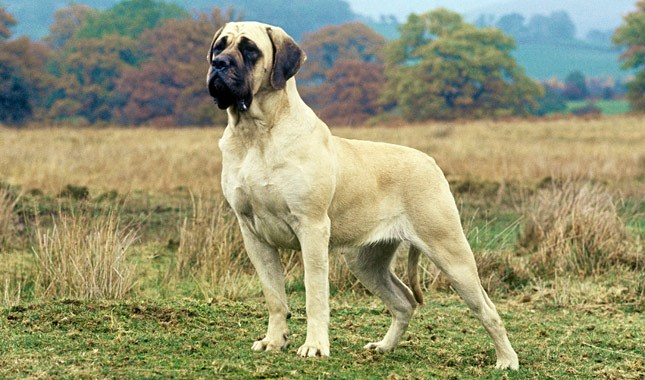

In [127]:
url='https://vetstreet.brightspotcdn.com/dims4/default/94eaf65/2147483647/thumbnail/645x380/quality/90/?url=https%3A%2F%2Fvetstreet-brightspot.s3.amazonaws.com%2F72%2F32%2Ff2a109cc4a59aec759fca90db449%2Fmastiff-ap-1czd1n-645.jpg'
Image(url)

### Reflection

The main learning from this project was that the machine learning implementation process can be very iterative. The training process takes a long time and can be very resource intensive. When I was training my models I had to use the provided GPU instances, which I burned through over 40 hours of gpu time trying out different variations. I also had done training before on sagemaker and overspent on resources and ended up getting a large charge on my credit card. I learned that the machine learning engineering process is expensive in terms of time, money, and computer resources. 

I also had to be very careful when training on the udacity gpu notebook. The notebook would shut down automatically when I left my model to train for over an hour. This meant I had to be by my computer atleast every ten minutes to wiggle my mouse so the instance would not shut down.

I was also shocked at how difficult it was to train a deep learning convolutional model from scratch. I have experience mostly with transfer learning, which tends to work fairly well in my past projects. After many iterations I finally landed on a model design that worked pretty well. 

Although it took me a lot of time to work through this project, I am happy with the experience and I learned a lot about image classification that I will carry with me through my career.

### Improvement

I know I can improve my final transfer learning model and model from scratch. Here are the ways I would improve the models if I had more time:
- Data Preprocessing: I would reconsider how I resized my validation and testing samples with the crop and resize transformatiom. Instead I believe I would use the resize function alone on the test and validation dataset along with toTensor. I believe this might have caused some issue with the training and testing. I am not certain about this, but would like to test this out for both the model from scratch and the transfer model.
- For the transfer learning model I would try different model architectures from more accurate pretrained models. I chose vgg16 as it already showed promise on the dog identifier, but I could see other models doing better.
- I would train my transfer learning model with more than 40 epochs to improve the model. I believe even with the current configuration I could squeeze more performance out of the model by training it further.

I am certain a better solution exists to this problem. With many other students completing this project I assume achieveing near 100% accuracy is possible.